<a href="https://colab.research.google.com/github/noaxacademy/blog/blob/main/data-science/noax_academy_blog_intro_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

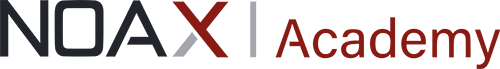

# Reduzcamos la dimensión del problema con análisis de componentes principales.

El análisis de componentes principales (PCA por sus siglas en inglés) es una de las técnicas estadísticas más usadas en el mundo, y no es para menos porque tiene multitud de usos:
* En esencia, es una **técnica de reducción de la dimensión** (luego veremos qué significa esto), pero también se puede usar para:
* **Visualizar** conjuntos de datos con muchas variables;
* **Reducir el ruido** en los datos (por ejemplo en imágenes).

Así que en este cuaderno veremos qué es el PCA, y cómo podemos usarlo en Python. ¡Vamos a por ello!

## Motivación

En los problemas de machine learning es habitual trabajar con decenas, cientos o incluso miles de variables simultáneamente a la hora de hacer predicciones. Cuantas más variables tengamos, mejor, ¿no? Más información tendremos disponible... Cuidado, porque eso no tiene porque ser cierto. Puede que muchas de las **variables del conjunto nos den información redundante** (por ejemplo, `código postal` y `ciudad` dan información parecida). Todas esas variables extra solo sirven, en el mejor de los casos, para ocupar memoria en el ordenador y ralentizar la ejecución de los algoritmos, y en el peor de los casos pueden afectar a las predicciones dando lugar a **overfitting**.

Esto es lo que se conoce como la **maldición de la dimensión**, y la forma de luchar contra este problema es... **reduciendo la dimensión del problema.** Existen varias formas de reducir la dimensión de un conjunto de datos. En entradas anteriores del blog ya vimos por ejemplo [cómo seleccionar las variables más importantes usando el lasso](https://blog.noaxacademy.com/selecciona-variables-con-la-regresion-lasso/), que después mejoramos en [otra entrada en la que estudiamos el adaptive lasso](https://blog.noaxacademy.com/mejoramos-el-lasso-con-la-idea-adaptive/).

Hoy vamos a ver una solución alternativa que no busca seleccionar las variables más importantes (como hacía el lasso), sino construir **variables nuevas que combinen la información de las originales.** Pero esta combinación se hará de una forma especial, ordenando las nuevas variables en función de la cantidad de información que son capaces de proporcionar. De esta forma podremos seleccionar, de entre las nuevas variables, aquellas que sean más importantes y que nos proporcionen más información. Además, como estas nuevas variables son combinaciones de las originales, seguimos manteniendo las partes más valiosas de nuestras antiguas variables (¡incluso cuando eliminamos una o más de estas "nuevas" variables!)

## Varianza y covarianza

Hemos dicho que con el PCA vamos a construir nuevas variables, que deben proporcionar cuanta más información mejor. Así que necesitamos medir de alguna forma la cantidad de información que proporcionan las variables. Para eso usaremos la varianza.

* **La varianza** mide la variabilidad de los datos, cómo de disperso es el conjunto de datos. Cuanto más alta es la varianza, más dispersos están los datos. Matemáticamente se define como,

$$
\operatorname{var}(x)=\frac{\sum\left(x_{i}-\bar{x}\right)^{2}}{N-1}
$$



![varianza](http://blog.noaxacademy.com/wp-content/uploads/2022/03/varianza_ej_1.png)

**Figura 1 |** A la izquierda, conjunto de datos con poca varianza. A la derecha, conjunto de datos con mucha varianza. 

De forma intuitiva, cuanta mayor sea la varianza de una variable, más información proporcionará así que buscaremos que las nuevas variables tengan la mayor varianza posible.

Además, otro problema que nos planteábamos era el de tener distintas variables que den información redundante, es decir, que las variables del conjunto de datos estén relacionadas unas con otras. Para medir esa relación usaremos la covarianza.

* **La covarianza** es una medida del grado en que dos variables están relacionadas linealmente y se mueven en la misma dirección. Matemáticamente se define como,

$$
\operatorname{cov}(x, y)=\frac{\sum\left(x_{i}-\bar{x}\right)\left(y_{i}-\bar{y}\right)}{N-1}
$$

![covarianza](http://blog.noaxacademy.com/wp-content/uploads/2022/03/covarianza_ej_1.png)

**Figura 2 |** A la izquierda, conjunto de variables con relación positiva. En el centro, conjunto de variables no relacionadas. A la derecha, conjunto con covarianza negativa

Y buscaremos construir nuevas variables que no estén relacionadas entre ellas, es decir, cuya covarianza sea 0. Para que conozcamos también estos nombres, decir que no están relacionadas es lo mismo que decir que son independientes, o geométricamente, que son ortogonales.

## ¿Cómo funciona el PCA?

Así que ya tenemos las ideas clave que queremos conseguir con el PCA. Si llamamos $X$ a la matriz de variables originales y llamamos $T$ a la matriz de nuevas variables (también llamadas `scores`) buscaremos:
* Construir scores que sean **combinaciones lineales** de las variables originales. Para eso buscaremos el valor óptimo para unos pesos $P$ (llamados también `loadings`) que cumplan que:

$$
t = x_1p_1 + x_2p_2 + \ldots + x_m p_m
$$
O en forma matricial,
$$
T=XP
$$

* La primera score debe proporcionar la mayor cantidad de información posible, es decir, **su varianza debe ser lo mayor posible.**
* La segunda score debe proporcionar la mayor cantidad de información posible, pero sujeta a la restricción de que la covarianza entre esta score y la primera sea 0, es decir, **que sean ortogonales**.

Veamos un ejemplo de dos dimensiones:

![pca_ej1](http://blog.noaxacademy.com/wp-content/uploads/2022/03/pca_ejemplo_1.png)

**Figura 3 |** A la izquierda, conjunto de variables originales con las direcciones principales marcadas en negro. A la derecha conjunto de datos tras la rotación del PCA.

La imagen izquierda nos muestra un conjunto de datos con dos variables en el que una de las variables, $x_1$ en el eje horizontal, tiene una variabilidad mucho mayor que la otra $x_2$ en el eje vertical. Además vemos que ambas variables están relacionadas, cuando el valor de una de ellas aumenta, el valor de la otra también aumenta. Es decir su covarianza es positiva. Al aplicar PCA aquí encontramos las dos direcciones principales, las que mayor cantidad de información explican pero asegurando que ambas direcciones sean ortogonales entre sí, y que aparecen marcadas como los vectores en negro. Después transformamos nuestro conjunto de datos, **proyectamos los datos** en el espacio generado por estas direcciones principales. El resultado son dos nuevas variables que ya no están relacionadas entre sí. Además, podemos ver que la dirección marcada por el vector más largo es la más importante porque es la que nos da más información así que si quisiésemos reducir la dimensión podríamos pasar de dos dimensiones a solo una y quedarnos únicamente con la primera variable.

![proyeccion_1d](http://blog.noaxacademy.com/wp-content/uploads/2022/03/proyeccion_1D.png)

**Figura 4 |** Proyección de un conjunto de dos dimensiones en el espacio generado por la primera componente principal.

## Elegir el número de variables.

Imagina que en vez de dos variables como en el ejemplo anterior tenemos 10 variables, o 50 variables o 100 variables. Al usar el algoritmo de PCA construiremos otras 10, o 50, o 100 nuevas variables pero con dos propiedades:
* Están ordenadas de mayor a menor variabilidad que explican.
* Son ortogonales entre sí.

La pregunta ahora es: ¿con cuantas variables nos quedamos? Lo más habitual es calcular la proporción del total de la varianza que cada nueva variable es capaz de explicar, y después elegir un umbral y seleccionar las variables suficientes para explicar hasta ese umbral de variabilidad. Valores habituales del umbral son un 80% o 90% pero esto depende en gran medida del problema que estemos tratando. 

## Matemáticamente...

**Warning**: esta sección entrará un poco en los detalles matemáticos del PCA, si no estás interesado o interesada, puedes saltártela sin problemas y pasar a la siguiente sección de uso de PCA en Python.

Matemáticamente entonces, el PCA resuelve un problema de maximización de la varianza,

$$
\hat{p}_{i}=\underset{p_{i} p_{j}=0,{\ }\left\|p_{i}\right\|=1}{\arg \max }\left\{\operatorname{var}\left(t_{i}\right)\right\}
$$

Este problema no es convexo, lo que dificultaría mucho encontrar su solución con algoritmos de optimización, pero afortunadamente el PCA tiene una solución analítica exacta. Veamos cómo encontrarla:

* Calcula la matriz de covarianzas de tus datos, $\Sigma=X^tX$.
* Obtén la descomposición en valores propios (eigen values en inglés) de la matriz anterior, $\Sigma=PDP^t$.
* La matriz $P$ es la matriz de vectores propios, que es también la que almacena los loadings de las nuevas variables. La matriz $D$ es una matriz diagonal con los valores propios.
* Puedes calcular el procentaje de variabilidad explicado por cada nueva variable dividiendo cada valor propio entre el total de la suma de todos ellos.
* Por último selecciona los primeros $k$ vectores propios. Estos definirán tus nuevas $k$ variables.

## Pasemos a `python`

Ahora que ya entendemos cómo funciona el análisis de componentes principales, vamos a usarlo para reducir la dimensión de un conjunto de imágenes bastante conocido, llamado **faces in the wild**, que contiene imágenes de varias figuras públicas de hace algunos años.  En concreto tenemos una matriz con 1348 filas, cada fila almacena la información de una imagen. Y cada imagen tiene tamaño 62 x 47 = 2914 pixeles en blanco y negro. Por tanto en este conjunto de datos tenemos 1348 observaciones y 2914 variables.

Empecemos por importar las librerías que necesitaremos y descargar el conjunto de datos desde sklearn.

In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

X = faces.data
y = faces.target

print(f'Tenemos {X.shape[0]} imágenes y {X.shape[1]} variables')
print('Tenemos imágenes de:\n', faces.target_names)

Tenemos 1348 imágenes y 2914 variables
Tenemos imágenes de:
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


Una vez descargados los datos, podemos ver algunas de las imágenes usando la función `imshow` de matplotlib, que permite representar matrices.

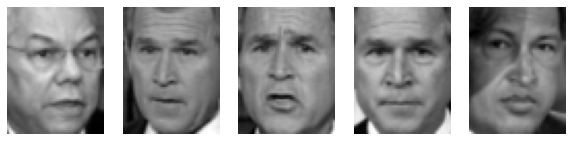

In [3]:
plt.figure(figsize=(10, 6))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(X[i,:].reshape((62, 47)), cmap='binary_r')
  plt.axis('off')

Este es claramente un conjunto de alta dimensión, ya que el número de variables es más del doble que el número de observaciones. Intentemos usar PCA para reducir la dimensión. Vamos a construir las nuevas variables y quedarnos con 150 de ellas.

In [4]:
pca = PCA(n_components = 150)
scores = pca.fit_transform(X)
print(f'La matriz con las nuevas variables tiene {scores.shape[0]} filas y {scores.shape[1]} variables')

La matriz con las nuevas variables tiene 1348 filas y 150 variables


Bueno, hemos conseguido pasar de 2914 variables a 150, pero veamos si hemos perdido mucha información en el proceso. Para ello comprobaremos el porcentaje de variabilidad que estas 150 variables son capaces de explicar de el total de variabilidad.

In [5]:
variabilidad_explicada =  np.round(100 * np.sum(pca.explained_variance_ratio_), 2)
print(f'Porcentaje de variabilidad explicada: {variabilidad_explicada}%')

Porcentaje de variabilidad explicada: 94.57%


Text(0, 0.5, 'Variabilidad explicada')

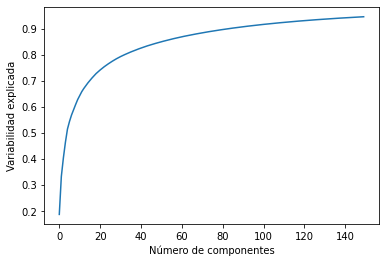

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variabilidad explicada')

¡Vaya! esto quiere decir que con solo 150 variables somos capaces de explicar el 94.5% de la variabilidad total que hay en los datos. Veamos si las nuevas variables realmente están almacenando algo de información importante, para ello proyectaremos las 150 variables de vuelta al espacio original y las representaremos como imágenes.

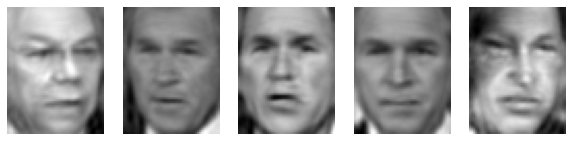

In [7]:
datos_proyectados = pca.inverse_transform(scores)
plt.figure(figsize=(10, 6))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(datos_proyectados[i,:].reshape((62, 47)), cmap='binary_r')
  plt.axis('off')

Aquí vemos la verdadera potencia del PCA. Hemos reducido las dimensiones en un factor de 20 quedandonos con 150 variables y aún así, estas 150 variables almacenan información lo suficientemente importante que al proyectarla de nuevo en el espacio original podemos reconocer a simple vista las personas a las que representan.


Aquí termina nuestra introducción al análisis de componentes principales, pero si queréis aprender más sobre otras técnicas estadísticas ¡estad atentos a los siguientes posts!

## Acerca del autor
###**Álvaro Méndez Civieta**
Álvaro Méndez obtuvo el título en matemáticas en 2015 por la Universidad de Oviedo, y el master en Big Data Analytics por la Universidad Carlos III en 2016. Después de un año trabajando en la consultora Accenture se unió al programa de doctorado de ingeniería matemática de la Universidad Carlos III, donde continúa trabajando en el desarrollo de modelos de selección de variables en espacios de alta dimensión, con aplicaciones al campo de la genética.